In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy
from scipy.interpolate import interp1d

from dynesty_orbits_3D_Sergey import prior_transform, model

import gala.potential as gp
import gala.dynamics as gd
from gala.dynamics import mockstream as ms
from gala.units import galactic

import astropy.units as u

In [6]:
posterior_samples[0].shape

(100,)

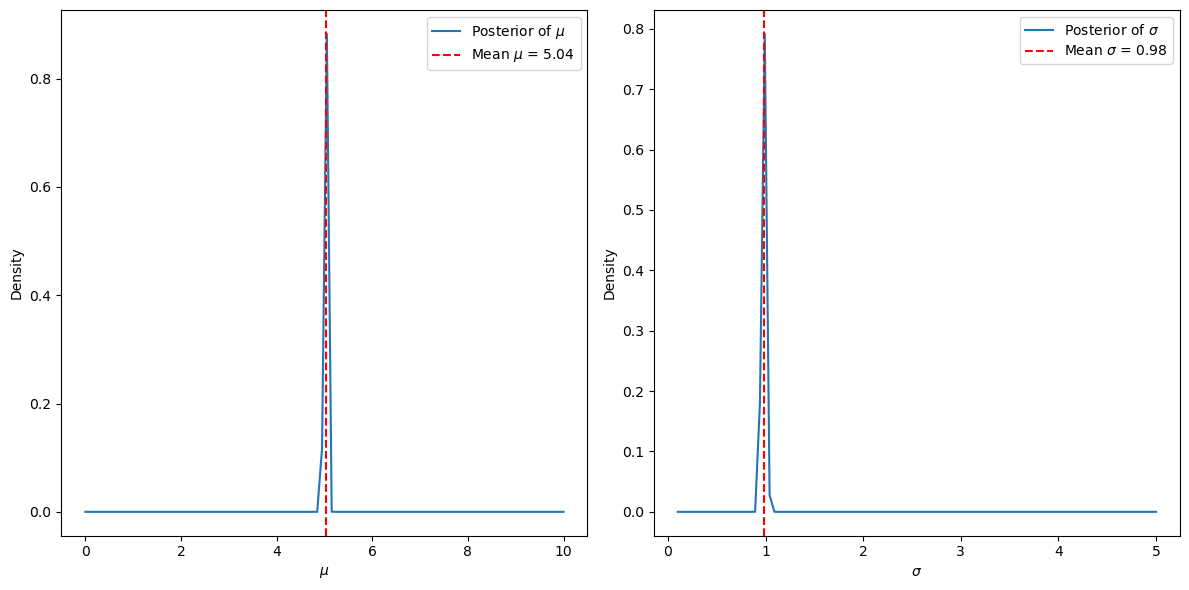

Posterior mean of mu: 5.04
Posterior mean of sigma: 0.98


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Assume we have posterior samples from 10 experiments
np.random.seed(42)
posterior_samples = [np.random.normal(loc=5, scale=1, size=100) for _ in range(10)]

# Grid definition
mu_values = np.linspace(0, 10, 100)
sigma_values = np.linspace(0.1, 5, 100)

# Priors (uniform)
prior_mu = np.ones_like(mu_values)  # Uniform prior for mu
prior_sigma = np.ones_like(sigma_values)  # Improper prior for sigma

# Initialize log-posterior grid
log_posterior_grid = np.zeros((len(mu_values), len(sigma_values)))

# Calculate log-posterior over grid
for i, mu in enumerate(mu_values):
    for j, sigma in enumerate(sigma_values):
        log_likelihood = 0
        for samples in posterior_samples:
            log_likelihood += np.sum(-0.5 * ((samples - mu) / sigma)**2 - np.log(sigma) - 0.5 * np.log(2 * np.pi))
        log_posterior_grid[i, j] = log_likelihood + np.log(prior_mu[i]) + np.log(prior_sigma[j])

# Stabilize by subtracting the maximum log value (to avoid overflow in exp)
log_posterior_grid -= np.max(log_posterior_grid)

# Convert log-posterior to posterior by exponentiating
posterior_grid = np.exp(log_posterior_grid)

# Normalize posterior
posterior_grid /= np.sum(posterior_grid)

# Marginal distributions
marginal_mu = np.sum(posterior_grid, axis=1)
marginal_sigma = np.sum(posterior_grid, axis=0)

# Calculate mean and credible intervals
mu_mean = np.sum(mu_values * marginal_mu)
sigma_mean = np.sum(sigma_values * marginal_sigma)

# Plot the marginal distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(mu_values, marginal_mu, label='Posterior of $\mu$')
plt.axvline(mu_mean, color='red', linestyle='--', label=f'Mean $\mu$ = {mu_mean:.2f}')
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
plt.plot(sigma_values, marginal_sigma, label='Posterior of $\sigma$')
plt.axvline(sigma_mean, color='red', linestyle='--', label=f'Mean $\sigma$ = {sigma_mean:.2f}')
plt.legend()
plt.xlabel('$\sigma$')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

print(f"Posterior mean of mu: {mu_mean:.2f}")
print(f"Posterior mean of sigma: {sigma_mean:.2f}")


100%|██████████| 5000/5000 [00:14<00:00, 347.69it/s]


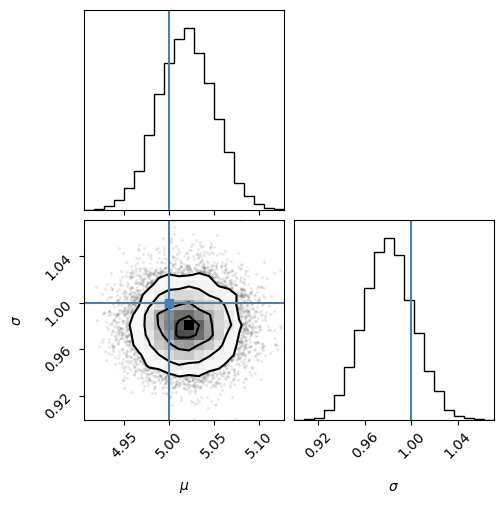

Posterior mean of mu: 5.02
Posterior mean of sigma: 0.98


In [7]:
import numpy as np
import emcee
import corner
import matplotlib.pyplot as plt

# Assume we have posterior samples from 10 experiments
np.random.seed(42)
posterior_samples = [np.random.normal(loc=5, scale=1, size=100) for _ in range(10)]

# Define the log-posterior function
def log_posterior(theta):
    mu, sigma = theta
    
    # Prior: assuming broad uniform priors
    if sigma <= 0:  # sigma must be positive
        return -np.inf
    
    # Log-prior (uniform priors, log of 1 is 0, so we can ignore it)
    log_prior = 0
    
    # Log-likelihood
    log_likelihood = 0
    for samples in posterior_samples:
        log_likelihood += np.sum(-0.5 * ((samples - mu) / sigma)**2 - np.log(sigma) - 0.5 * np.log(2 * np.pi))
    
    return log_prior + log_likelihood

# Initial guess for mu and sigma
initial = np.array([5.0, 1.0])

# Number of dimensions (mu and sigma)
ndim = 2

# Number of walkers (independent chains)
nwalkers = 50

# Initial positions of the walkers
pos = initial + 1e-4 * np.random.randn(nwalkers, ndim)

# Set up the MCMC sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior)

# Run MCMC
nsteps = 5000
sampler.run_mcmc(pos, nsteps, progress=True)

# Get the chain of samples after burn-in (e.g., first 1000 steps)
samples = sampler.get_chain(discard=1000, thin=15, flat=True)

# Plot the corner plot
fig = corner.corner(samples, labels=[r"$\mu$", r"$\sigma$"], truths=[5.0, 1.0])

plt.show()

# Print some statistics
mu_mean = np.mean(samples[:, 0])
sigma_mean = np.mean(samples[:, 1])

print(f"Posterior mean of mu: {mu_mean:.2f}")
print(f"Posterior mean of sigma: {sigma_mean:.2f}")


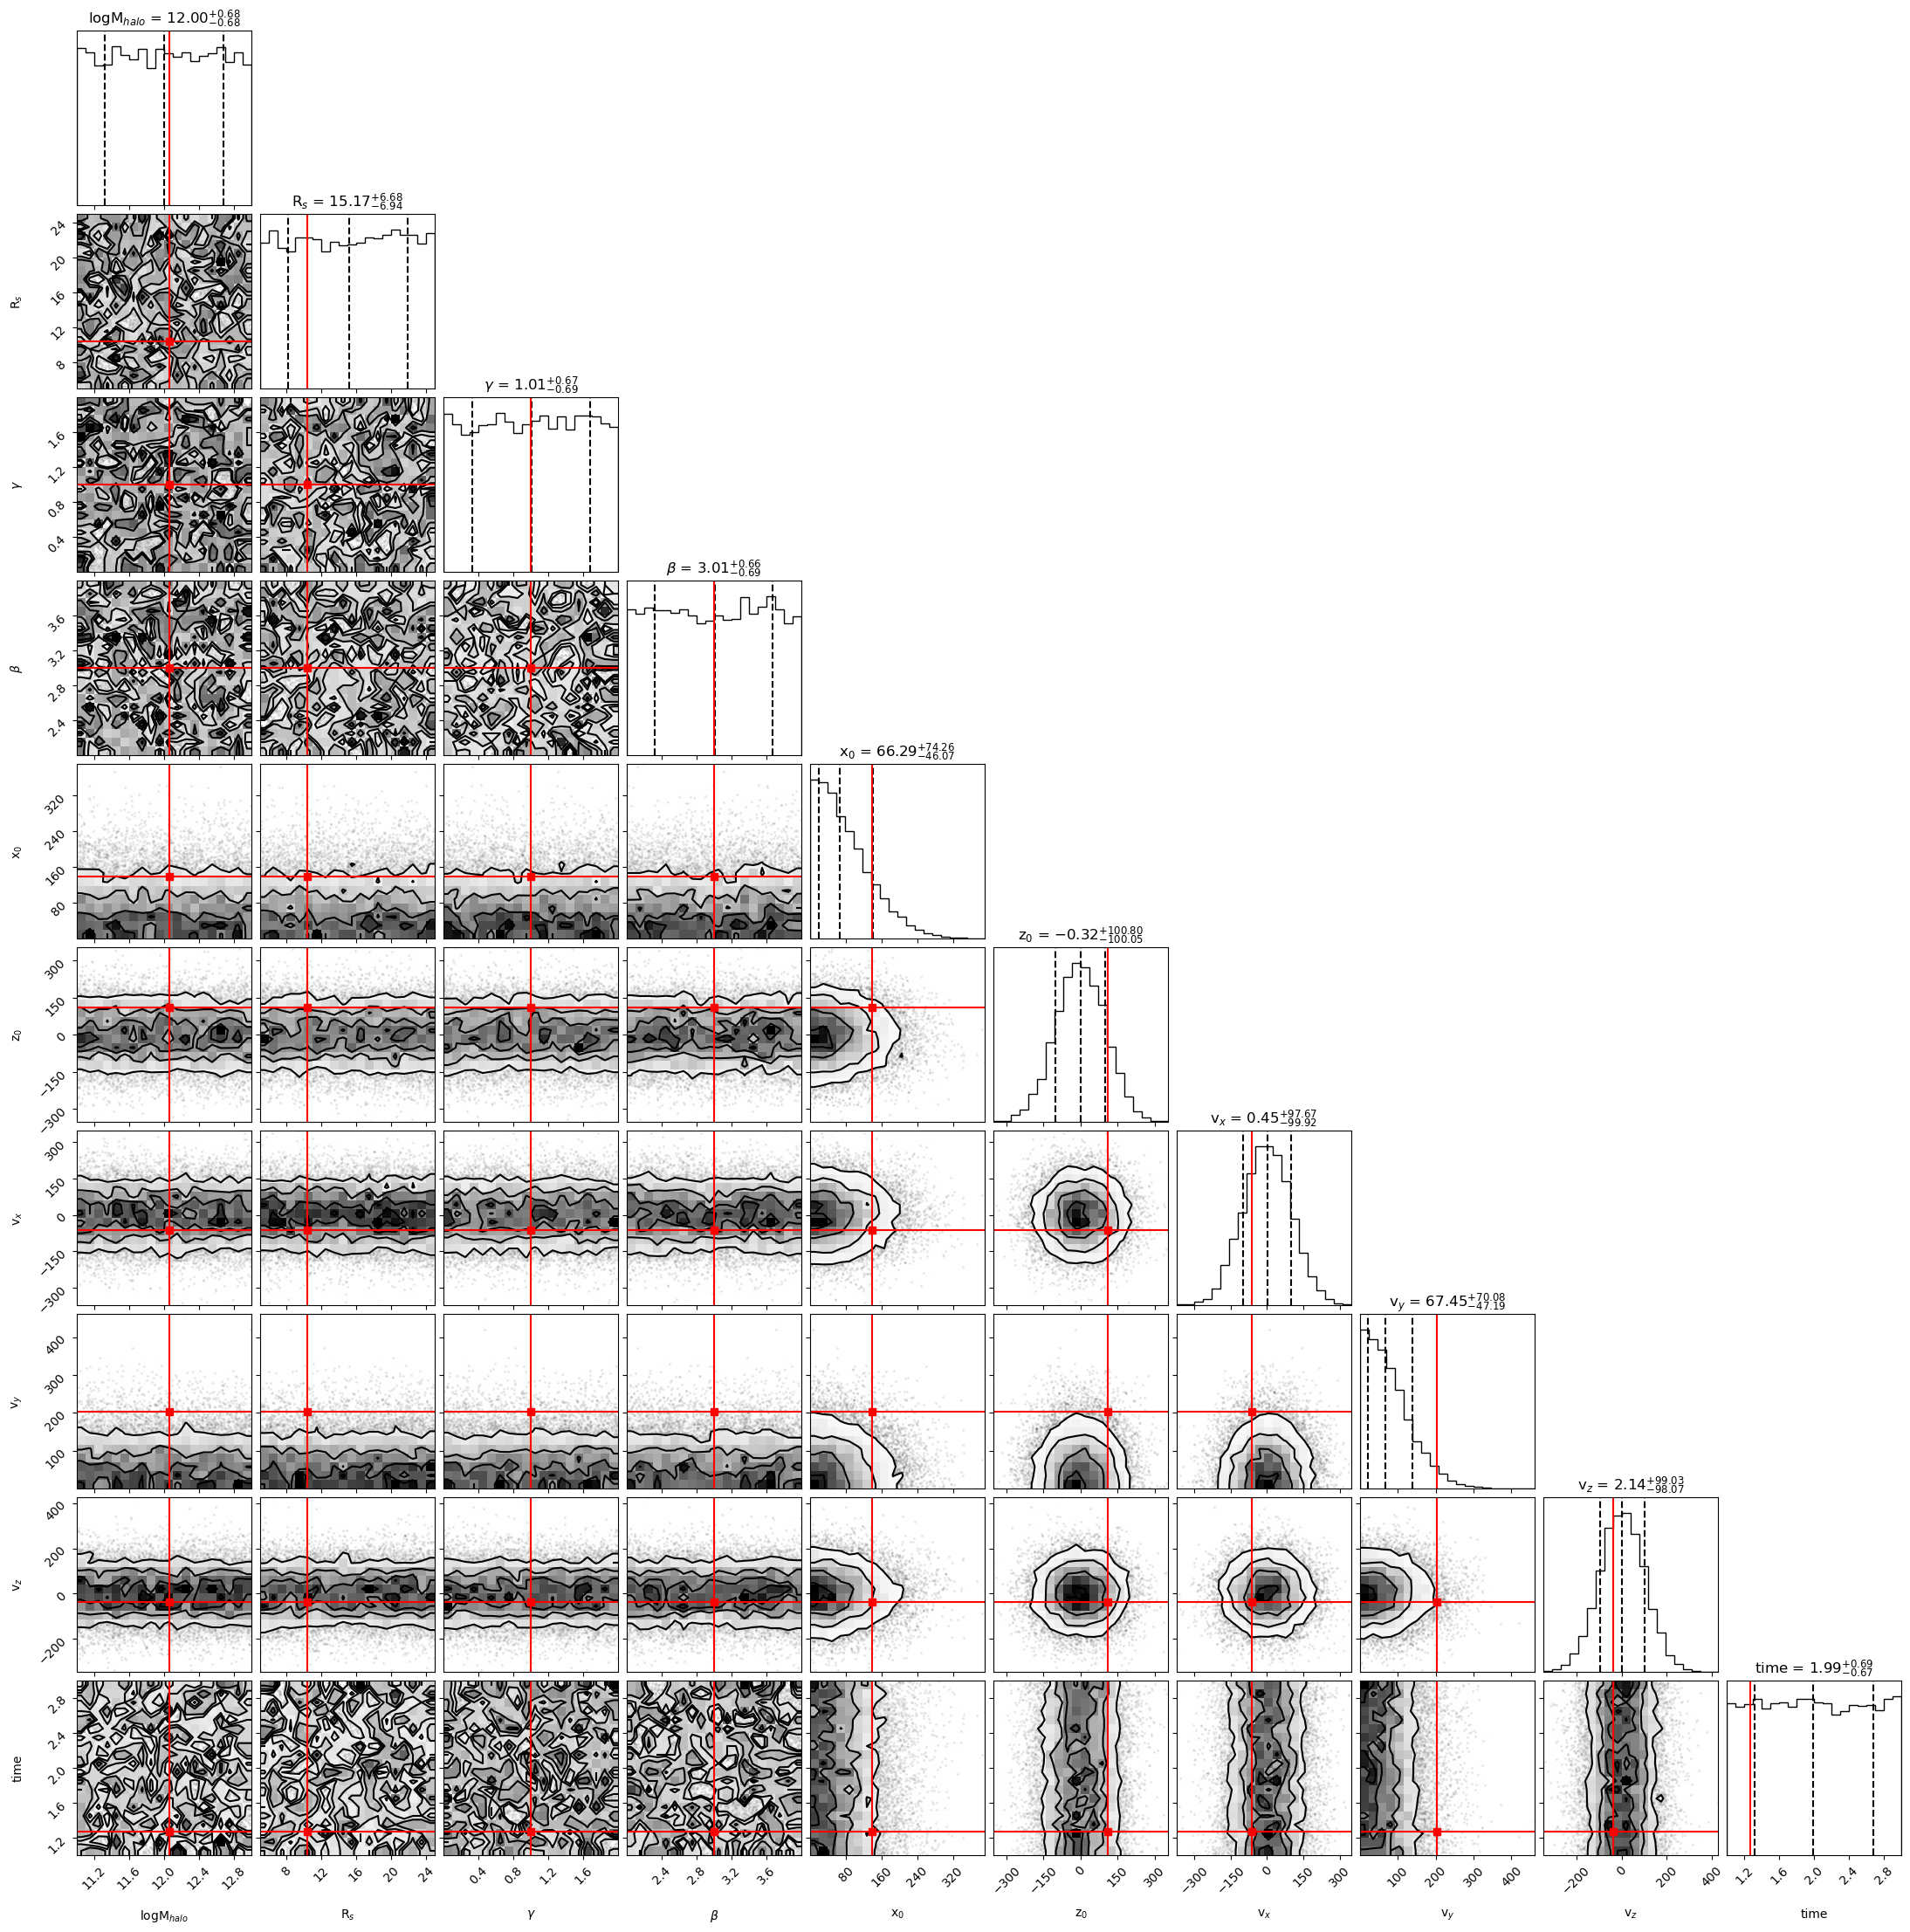

In [ ]:
import corner
import numpy as np
import matplotlib.pyplot as plt

# Create a corner plot with the true values
figure = corner.corner(dns['samps'], 
                       labels = [r'logM$_{halo}$', r'R$_s$', r'$\gamma$', r'$\beta$', r'x$_0$', r'z$_0$', r'v$_x$', r'v$_y$', r'v$_z$', 'time'],
                       quantiles=[0.16, 0.5, 0.84], 
                       show_titles=True, 
                       title_kwargs={"fontsize": 12},
                       truths=params, 
                       truth_color='red')
# Show the plot
plt.show()
